### Podatkovno rudarjenje, koda za vmesno poročilo o opravljenem delu, 01. 04. 2019

# Priprava podatkov in osnovna vizualizacija

**Nejc Prijatelj**

**Žan Pristopec**

**Matevž Kušar**

V tem notebook-u bomo pisali kodo za obdelavo podatkov, iz katerih bomo s pomočjo pythona, statistike in vizualizacije poiskusili odgovoriti na čim več vprašanj, ki smo si jih zastavili pri izbiri projekta.

## Podatki

Kratek opis podatkov je bil podan že pri osnutku projekta, tu pa bi si najprej na hitro pogledali kaj točno dani podatki vsebujejo. Link do podatkov(https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

Vse podatke ki smo jih dobili s spletne strani Kaggle hranimo v datoteki "master.csv".

Vsak podatek v tej zbirki ima naslednje atribute:
* *country:* država v kateri so bili zabeleženi samomori.
* *year:* leto na katerega se nanašajo podatki.
* *sex:* spol starostne skupine za to leto.
* *age_group:* starostna skupina.
* *count_of_suicides:* število samomorov za to leto.
* *population:* število oseb določenega spola v tem letu, za to starostno skupino.
* *suicide_rate:* pogostost samomorov - število samomorov na 100 tisoč ljudi.
* *country-year_composite_key:* država-leto ključ.
* *HDI_for_year:* indeks človekovega razvoja (izračunano iz življenjske dobe, stopnje izobrazbe in življenjske ravni).
* *GDP_for_year:* bruto domači proizvod države za tisto leto.
* *GDP_per_capita:* bruto domači proizvod na prebivalca države za tisto leto.
* *generation:* generacija (temelji na povprečju starostne skupine).

S pomočjo zgoraj naštetih atributov bomo v vmesnem poročilu podatke prebrali, ter jih vizualno predstavili.


### Pridobivanje podatkov

Najprej smo vse podatke prebrali v panda data frame s spodaj napisano funkcijo, in v vsaki tabeli spremenili datume tako, da so bolj po našem okusu.

In [1]:
import pandas as pd

main = pd.read_csv('master.csv', sep=',', encoding='cp1250', header=1, names = ['country', 'year', 'sex', 'age', 'suicide_no', 'population', 'suicide_per_100k', 'country_year', 'HDI', 'GDP', 'GPD_per_capita', 'generation'])


### Nekaj vizualnih predstavitev

Ker je tako velika količina podatkov prevelika da bi iz nje lahko kar tako ugotovili določene zanimive lastnosti, smo se odločili da bomo najprej naredili nekaj grafov da dobimo občutek s čem imamo opravka, in da predstavimo nekatere bolj zanimive podatke.

Pri spodnji kodi smo uporabili stopnjo samomorov, saj le ta ni odvisna od populacije države.

In [2]:
df = main[['country','suicide_per_100k']]
df1 = df.groupby(['country'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)[:20]
df2

,country,suicide_per_100k
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321


Spodaj je število vseh samomorov v podatkovni zbirki, razdeljenih po spolu.

In [3]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


df = main[['sex', 'suicide_no']]
df = df.groupby('sex', as_index=False).sum()

graf = df.plot(kind='bar', x='sex', legend=False)

Povprečno število samomorov in povprečni GPD na prebivalca za vse države.

In [4]:
df2 = main[["country", "suicide_per_100k"]]
df2 = df2.groupby(['country'], as_index=False).mean()
df3 = main[["country", "GPD_per_capita"]]
df3 = df3.groupby(['country'], as_index=False).mean()
df2['GPD_per_capita'] = df3['GPD_per_capita']
df2

,country,suicide_per_100k,GPD_per_capita
0,Albania,3.490684,1863.087452
1,Antigua and Barbuda,0.552901,10448.185185
2,Argentina,10.469328,7914.096774
3,Armenia,3.275872,1873.919463
4,Aruba,9.503095,24221.642857
5,Australia,12.992806,32776.400000
6,Austria,23.759764,34261.780105
7,Azerbaijan,1.855417,1005.125000
8,Bahamas,1.247391,25836.391304
9,Bahrain,1.854127,18039.523810


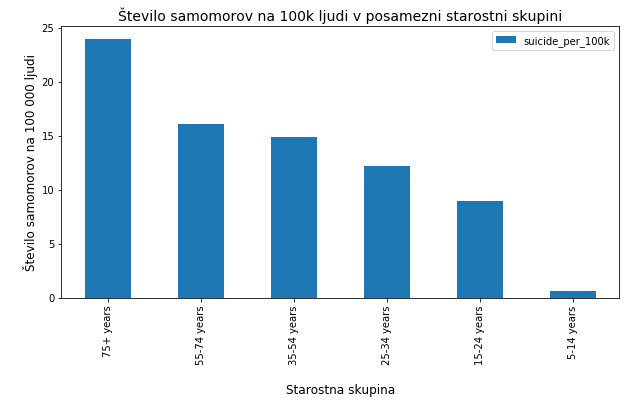

In [5]:
df = main[['age','suicide_per_100k']]
df1 = df.groupby(['age'], as_index=False).mean().sort_values(by=['suicide_per_100k'], ascending=False)
df2 = df1.reset_index(drop=True)
graf = df2.plot(kind='bar', x='age', legend=False, figsize=(10,5))
graf.legend();
graf.set_title("Število samomorov na 100k ljudi v posamezni starostni skupini", fontsize=14)
graf.set_xlabel("\nStarostna skupina", fontsize=12)
graf.set_ylabel("\nŠtevilo samomorov na 100 000 ljudi", fontsize=12);